# Pracownia 2 z Analizy numerycznej
### Zadanie 19
#### Autorzy:
Martyna Firgolska  
Michał Dymowski

In [1]:
using Printf

In [2]:
using Plots

Wyniki ogólnie:  
A: I_c i I_s w miarę się liczą  
B: I_c daje bardzo zły wynik, I_s liczy się jak w A  
C: I_c zbiega znacznie lepiej niż w A, I_s jak w A  
D: Wyniki znacznie dokładniejsze niż w pozostałych podpunktach. Dokładności dla IS i IC zachowują się różnie. 

**Badane całki: definicje, przybliżone wartości, wykresy**

In [3]:
# przybliżone wartości całek I_c i I_s, źródło: Wolfram Alpha
#Int_C_exact_value = 1.809048475800544162949576733665114291615983641191003479196640074902159185352954615877833522127454977
#Int_S_exact_value = 0.6205366034467622036163048463307930151490187776648934354652171212875447590052889374947286820148085157
Int_C_exact_value = 1.809045218947
Int_S_exact_value = 0.620549071924

0.620549071924

In [4]:
# badane funkcje zmodyfikowane zgodnie z podpunktem A
# funkcje C i S przyjmują wartość 0 w x=0
function C(x)
    if( x == 0)
        return 0;
    else
        return cos(x)/sqrt(x);
    end
end

function S(x)
    if(x == 0)
        return 0;
    else
        return sin(x)/sqrt(x);
    end
end

S (generic function with 1 method)

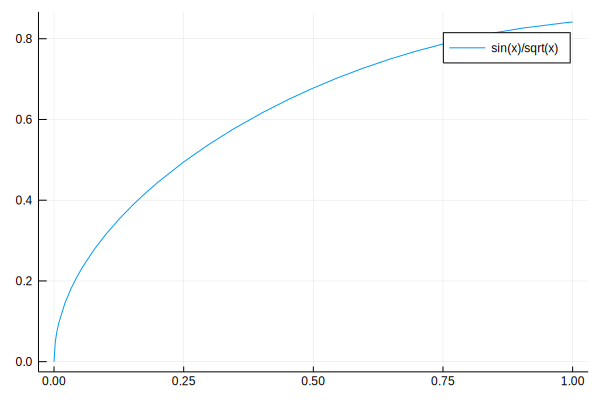

In [5]:
# Wykres funkcji S na badanym przedziale
plot(S, 0, 1, label="sin(x)/sqrt(x)")

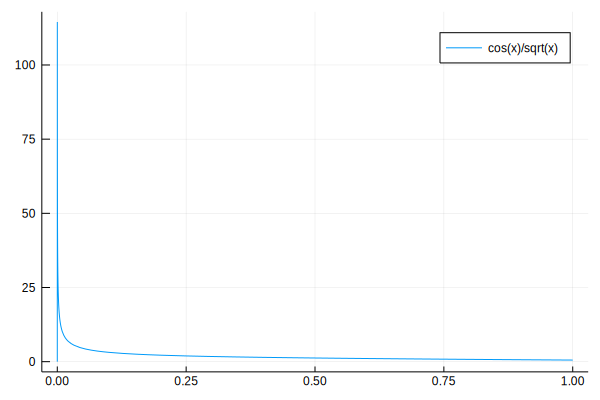

In [6]:
# Wykres funkcji C na badanym przedziale
plot(C, 0, 1, label="cos(x)/sqrt(x)")

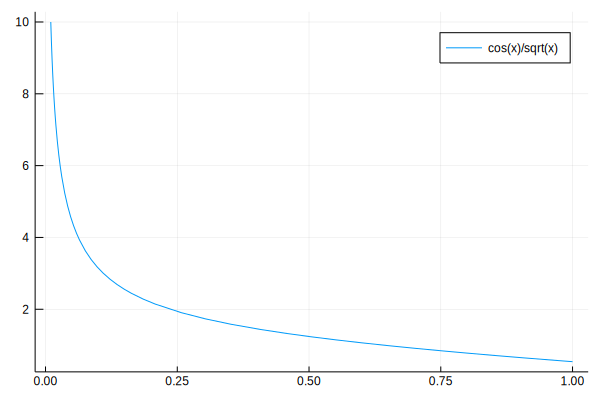

In [7]:
# Wykres funkcji C na przedziale [0.01, 1]
plot(C, 0.01, 1, label="cos(x)/sqrt(x)")

### Metoda trapezów: 

In [8]:
# Całkowanie funkcji f na przedziale [left,right] 
# metodą trapezów z points równoodległymi punktami
function int_trapez(f, left, right, points)
    width = (right-left)/(points-1);
    sum = (f(left)+f(right))*0.5;
    
    for i in 1:(points-1)
        sum += f(left + i*width);
    end
    
    sum *= width;
    return sum;
end

int_trapez (generic function with 1 method)

In [9]:
# Całkowanie funkcji f na przedziale [left,right] 
# metodą trapezów z points równoodległymi punktami
# zaczynajac od prawej strony
function int_trapez_right_to_left(f, left, right, points)
    width = (right-left)/(points-1);
    sum = (f(left)+f(right))*0.5;
    
    for i in (points-1):1
        sum += f(left + i*width);
    end
    
    sum *= width;
    return sum;
end

int_trapez_right_to_left (generic function with 1 method)

### Podpunkt A

In [10]:
## badany zakres ilości punktów metody trapezów
Arange = 100:100:1000

100:100:1000

In [11]:
# wyniki metody trapezów dla I_c
AresultsIC = [int_trapez(C,0.0,1.0,p) for p in Arange]

10-element Array{Float64,1}:
 1.6677256034277628
 1.7082394599682968
 1.726399997150005 
 1.7372928699596446
 1.7447564299910763
 1.750281758632448 
 1.7545855714753669
 1.7580609258924103
 1.7609438155984576
 1.7633856545771385

In [12]:
# wyniki metody trapezów dla I_s
AresultsIS = [int_trapez(S,0.0,1.0,p) for p in Arange]

10-element Array{Float64,1}:
 0.6288262828757042
 0.6246912988653139
 0.6233107905275299
 0.6226195323389588
 0.6222043082298286
 0.6219272438774593
 0.6217291960934527
 0.6215805696160139
 0.6214649112045778
 0.6213723429157811

In [13]:
# moduł błędu bezwzględnego
AerrorIC = abs.([x-Int_C_exact_value for x in AresultsIC])

10-element Array{Float64,1}:
 0.14131961551923733 
 0.10080575897870325 
 0.08264522179699507 
 0.0717523489873555  
 0.06428878895592383 
 0.05876346031455215 
 0.05445964747163323 
 0.050984293054589847
 0.048101403348542515
 0.04565956436986163 

In [14]:
# moduł błędu bezwzględnego
AerrorIS = abs.([x-Int_S_exact_value for x in AresultsIS])

10-element Array{Float64,1}:
 0.008277210951704195 
 0.004142226941313942 
 0.002761718603529917 
 0.0020704604149588413
 0.0016552363058286446
 0.0013781719534593506
 0.0011801241694526787
 0.0010314976920139385
 0.0009158392805778126
 0.0008232709917811443

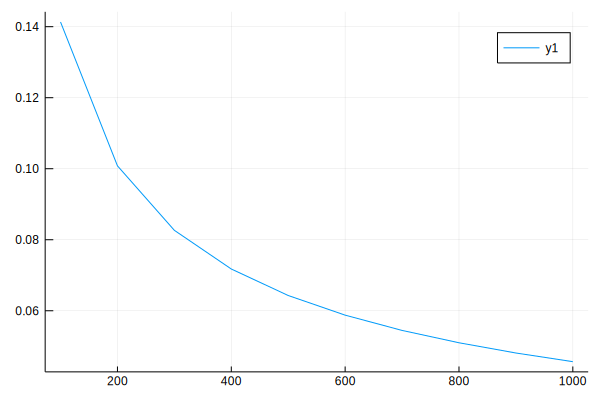

In [15]:
# wykres błędu bezwzględnego w zależności od ilości punktów metody trapezów dla I_c
plot(Arange, AerrorIC)

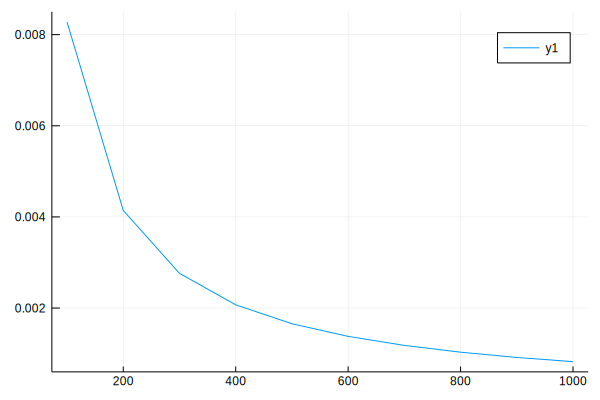

In [16]:
# wykres błędu bezwzględnego w zależności od ilości punktów metody trapezów dla I_s
plot(Arange, AerrorIS)

In [17]:
# błędy względne
Arel_errorIS = [abs(x/Int_S_exact_value) for x in AerrorIS]
Arel_errorIC = [abs(x/Int_C_exact_value) for x in AerrorIC]

10-element Array{Float64,1}:
 0.07811834333333909 
 0.0557231836567246  
 0.045684442230305766
 0.03966310418106671 
 0.0355374140361979  
 0.03248313513620013 
 0.030104083027472816
 0.028182984328200777
 0.026589386956585383
 0.02523959262689902 

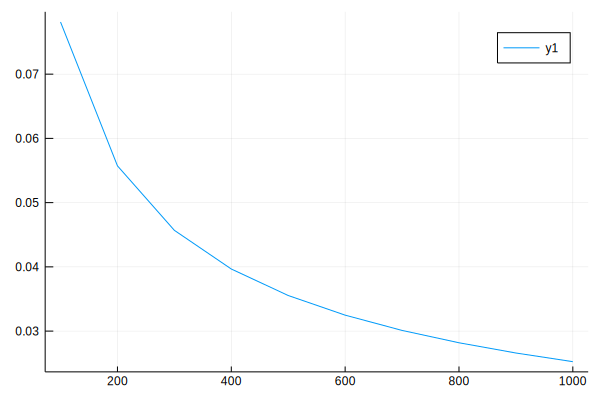

In [18]:
# wykres błędu względnego w zależności od ilości punktów metody trapezów dla I_c
plot(Arange, Arel_errorIC)

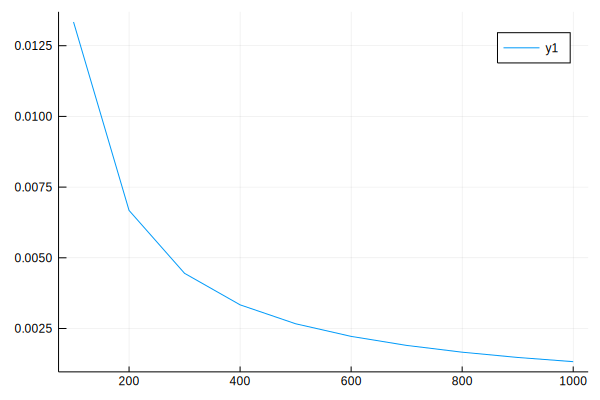

In [19]:
# wykres błędu względnego w zależności od ilości punktów metody trapezów dla I_s
plot(Arange, Arel_errorIS)

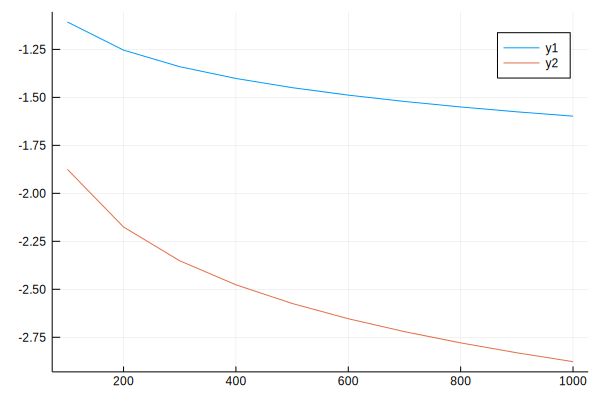

In [20]:
# wykres logarytmu z błędu względnego - porównanie działania metody trapezów dla I_s i I_c
plot(Arange, [log10(x) for x in Arel_errorIC])
plot!(Arange, [log10(x) for x in Arel_errorIS])

Wnioski:  
Metoda poprawnie liczy obie całki, ale lepiej radzi sobie z S  
Prawdopodobnie wynika to z faktu, że funkcja S jest ograniczona 
na badanym przedziale i jej granica w zerze wynosi 0
a funkcja C jest nieograniczona w okolicy 0

### Podpunkt B

In [21]:
## Ale jak użyjemy poprawnie wyprowadzonego wzorku to wyniki już są poprawne ##
# wzorek: int_trapez(C,h,1.0,p)+(2.0/3.0)*sqrt(h)*(2*cos(0*h)+cos(h))
Brange = Arange
h = 2e-10
BresultsIC = [(int_trapez(C,h,1.0,p)+(2.0/3.0)*sqrt(h)*(2*cos(0)+cos(h))) for p in Brange]

10-element Array{Float64,1}:
 358.79239077659105 
 179.3732881036611  
 119.97170938813724 
  90.34719346043909 
  72.5971675786862  
  60.77424835413889 
  52.334498043775646
  46.00757487519528 
  41.088379269190014
  37.15414371263429 

In [22]:
BresultsIS = [(int_trapez(S,h,1.0,p)+(2.0/3.0)*sqrt(h)*(2*sin(0)+sin(h))) for p in Brange]

10-element Array{Float64,1}:
 0.6288263542843195
 0.6246913343871437
 0.6233108141675909
 0.6226195500532103
 0.6222043223934388
 0.6219272556760056
 0.6217292062036702
 0.6215805784605386
 0.6214649190650054
 0.6213723499891415

In [23]:
# nie wiem dlaczego dla S niepoprawny wzorek działa lepiej
# ale zobaczmy jak to będzie wyglądać jeśli za h przyjmiemy 1/p
BresultsICv2 = [(int_trapez(C,1.0/p,1.0,p)+(2.0/3.0)*sqrt(1.0/p)*(2*cos(0)+cos(1.0/p))) for p in Brange]
BresultsISv2 = [(int_trapez(S,1.0/p,1.0,p)+(2.0/3.0)*sqrt(1.0/p)*(2*sin(0)+sin(1.0/p))) for p in Brange]

10-element Array{Float64,1}:
 0.6289110872019322
 0.6247296338953485
 0.6233336846692772
 0.622635190715545 
 0.6222158984721524
 0.6219362781243871
 0.6217364995379555
 0.6215866360800248
 0.6214700568571285
 0.6213767809176636

In [24]:
BerrorICv2 = abs.([x-Int_C_exact_value for x in BresultsICv2])
BerrorISv2 = abs.([x-Int_S_exact_value for x in BresultsISv2])
BerrorIC = abs.([x-Int_C_exact_value for x in BresultsIC])
BerrorIS = abs.([x-Int_S_exact_value for x in BresultsIS])

10-element Array{Float64,1}:
 0.008277282360319549 
 0.004142262463143753 
 0.0027617422435909367
 0.0020704781292103513
 0.0016552504694388182
 0.0013781837520056017
 0.0011801342796702308
 0.0010315065365386067
 0.0009158471410054547
 0.0008232780651414862

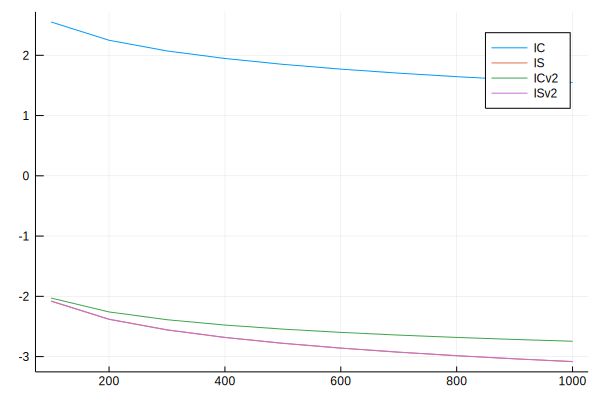

In [25]:
plot(Brange, [log10(x) for x in BerrorIC], label="IC")
plot!(Brange, [log10(x) for x in BerrorIS], label="IS")
plot!(Brange, [log10(x) for x in BerrorICv2], label="ICv2")
plot!(Brange, [log10(x) for x in BerrorISv2], label="ISv2")

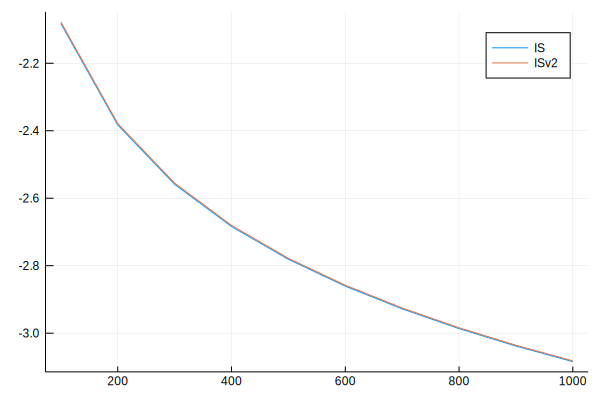

In [26]:
#wykresy Is i Isv2 się pokrywają
plot(Brange, [log10(x) for x in BerrorIS], label="IS")
plot!(Brange, [log10(x) for x in BerrorISv2], label="ISv2")

In [27]:
Brel_errorICv2 = [x/Int_C_exact_value for x in BerrorICv2]
Brel_errorISv2 = [x/Int_S_exact_value for x in BerrorISv2]
Brel_errorIC = [x/Int_C_exact_value for x in BerrorIC]
Brel_errorIS = [x/Int_S_exact_value for x in BerrorIS]

10-element Array{Float64,1}:
 0.013338642719512898 
 0.006675156970746489 
 0.004450481627549954 
 0.003336526026524986 
 0.0026673965755951374
 0.0022209101815793076
 0.0019017581897451687
 0.0016622481334803085
 0.0014758657815181141
 0.0013266929279080685

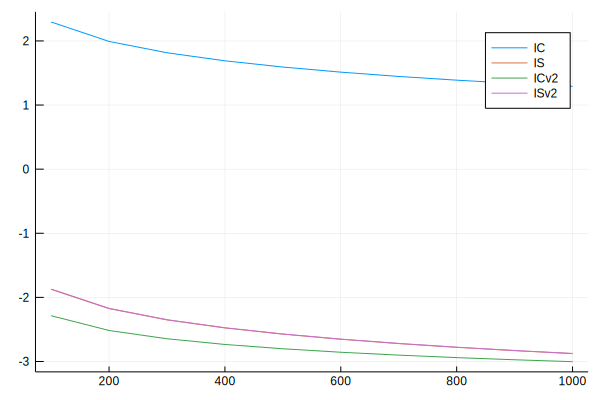

In [28]:
plot(Brange, [log10(x) for x in Brel_errorIC], label="IC")
plot!(Brange, [log10(x) for x in Brel_errorIS], label="IS")
plot!(Brange, [log10(x) for x in Brel_errorICv2], label="ICv2")
plot!(Brange, [log10(x) for x in Brel_errorISv2], label="ISv2")

Wnioski:  
Znowu, tak jak się spodziewaliśmy całka I_s liczy się lepiej  
W I_c widzimy poprawę, gdy zmieniamy wartość h  
I_s daje te same wyniki niezależnie od h

### Podpunkt C

In [29]:
#Podpunkt C, 
#funkcja C zmienia się w 2*cos(t^2), a S w 2*sin(t^2)
Cnew(x) = 2*cos(x^2);
Snew(x) = 2*sin(x^2);


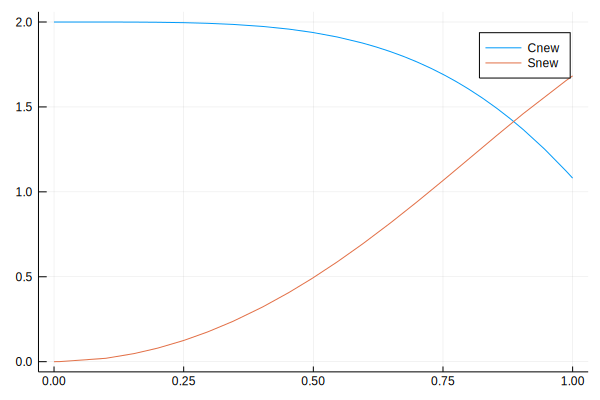

In [30]:
plot(Cnew, 0, 1, label="Cnew")
plot!(Snew, 0, 1, label="Snew")

In [31]:
Crange = 20:20:200
CresultsIC = [int_trapez(Cnew,0.0,1.0,p) for p in Crange]
CresultsIS = [int_trapez(Snew,0.0,1.0,p) for p in Crange]
CresultsIC_rangeA = [int_trapez(Cnew,0.0,1.0,p) for p in Arange]
CresultsIS_rangeA = [int_trapez(Snew,0.0,1.0,p) for p in Arange]

10-element Array{Float64,1}:
 0.6375543934526344
 0.6289981461788563
 0.6261671864394782
 0.624755634400694 
 0.6239099559383896
 0.623346691324667 
 0.622944614354665 
 0.6226431959091088
 0.6224088418274413
 0.6222214105045255

In [32]:
CerrorIC = abs.([x-Int_C_exact_value for x in CresultsIC])
CerrorIS = abs.([x-Int_S_exact_value for x in CresultsIS])
Crel_errorIC = [x/Int_C_exact_value for x in CerrorIC]
Crel_errorIS = [x/Int_S_exact_value for x in CerrorIS]
CerrorIC_rangeA = abs.([x-Int_C_exact_value for x in CresultsIC_rangeA])
CerrorIS_rangeA = abs.([x-Int_S_exact_value for x in CresultsIS_rangeA])
Crel_errorIC_rangeA = [x/Int_C_exact_value for x in CerrorIC_rangeA]
Crel_errorIS_rangeA = [x/Int_S_exact_value for x in CerrorIS_rangeA]

10-element Array{Float64,1}:
 0.02740366926326998  
 0.013615481252208012 
 0.009053457284303675 
 0.006778774905990399 
 0.0054159842733617425
 0.004508296808813307 
 0.0038603593801818845
 0.0033746307582347775
 0.00299697475604161  
 0.0026949336582527787

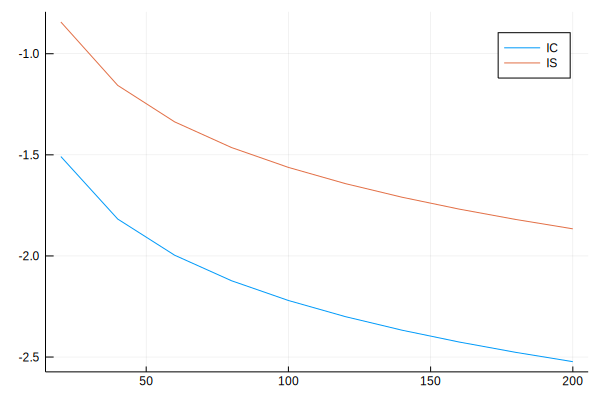

In [33]:
plot(Crange, [log10(x) for x in Crel_errorIC], label="IC")
plot!(Crange, [log10(x) for x in Crel_errorIS], label="IS")

Obserwacje:  
Ta metoda działa lepiej dla I_c niż dla I_s  
Czemu? Może dlatego, że sin(t^2) na przedziale [0,1] przyjmuje wartości bliskie 0, a cosinus nie? No nie wiem?  
W każdym razie funkcja cos(t^2) już nie ma problemu w 0 (tak jak to było dla oryginalnej funkcji C) i pewnie dlatego ta metoda działa lepiej niż reszta

### Podpunkt D

In [34]:
# Kwadratury Gaussa-Legendre'a na przedziale [-1,1]
function base_q_1(f)
	return 2.0*f(0.0);
end

function base_q_2(f)
x_1 = -1*sqrt(3.0)/3.0;
x_2 = sqrt(3.0)/3.0;

w_1 = 1;
w_2 = 1;
	return w_1*f(x_1)+w_2*f(x_2);
end

function base_q_3(f)
x_1 = -1*sqrt(15.0)/5.0;
x_2 = 0;
x_3 = sqrt(15.0)/5.0;

w_1 = 5.0/9.0;
w_2 = 8.0/9.0;
w_3 = 5.0/9.0;
	return w_1*f(x_1)+w_2*f(x_2)+w_3*f(x_3);
end

function base_q_4(f)
x_1 = -1*sqrt(525.0 - 70*sqrt(30.0))/35.0;
x_2 = -1*sqrt(525.0 + 70*sqrt(30.0))/35.0;
x_3 = sqrt(525.0 + 70*sqrt(30.0))/35.0;
x_4 = sqrt(525.0 - 70*sqrt(30.0))/35.0;

w_1 = (18.0+sqrt(30.0))/36.0;
w_2 = (18.0-sqrt(30.0))/36.0;
w_3 = (18.0-sqrt(30.0))/36.0;
w_4 = (18.0+sqrt(30.0))/36.0;
	return w_1*f(x_1)+w_2*f(x_2)+w_3*f(x_3)+w_4*f(x_4);
end

# Zamiana przedziału całkowania [0,1] na [-1,1]
function shift(f)
	function out(x)
		return 0.5*f((x+1.0)*0.5);
	end
	return out
end                                    

shift (generic function with 1 method)

#### Skutki użycia kwadratur G-L do obliczania całek przed podstawieniem.
Wyniki mogą być znacznie gorsze niż po podstawieniu, bo tutaj funkcje nie rozwijają się w wielomian.

In [35]:
# Wyniki dla IC (przed podstawieniem)
DresultsIC = [base_q_1(shift(C)),base_q_2(shift(C)),
        base_q_3(shift(C)),base_q_4(shift(C))]

4-element Array{Float64,1}:
 1.2410891611274912
 1.4602734369657506
 1.5600047441797524
 1.6154157691891489

In [36]:
# Wyniki dla IS (przed podstawieniem)
DresultsIS = [base_q_1(shift(S)),base_q_2(shift(S)),
        base_q_3(shift(S)),base_q_4(shift(S))]

4-element Array{Float64,1}:
 0.6780100988420897
 0.6275585255097963
 0.6230432871195827
 0.6216966495442177

In [37]:
# wartość błędu bezwzględnego - IC (przed podstawieniem)
DerrorIC = abs.([x-Int_C_exact_value for x in DresultsIC])

4-element Array{Float64,1}:
 0.5679560578195089 
 0.3487717819812495 
 0.24904047476724767
 0.19362944975785124

In [38]:
# wartość błędu bezwzględnego -IS (przed podstawieniem)
DerrorIS = abs.([x-Int_S_exact_value for x in DresultsIS])

4-element Array{Float64,1}:
 0.05746102691808974  
 0.007009453585796299 
 0.002494215195582683 
 0.0011475776202176657

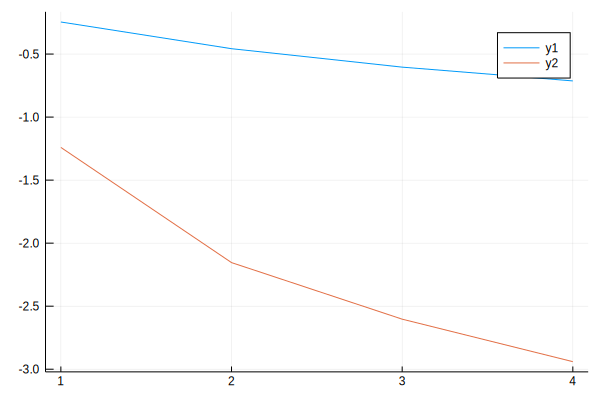

In [39]:
#  wykres błędu bezwzględnego w zależności od stopnia użytej
#+ kwadratury
plot([log10(x) for x in DerrorIC])
plot!([log10(x) for x  in DerrorIS])

In [40]:
# błąd względny - IC (przed podstawieniem)
Drel_errorIC = [abs(x/Int_C_exact_value) for x in DerrorIC]

4-element Array{Float64,1}:
 0.31395348876359314
 0.19279329136076587
 0.13766404076522082
 0.10703405737450725

In [41]:
# błędy względne - IS (przed podstawieniem)
Drel_errorIS = [abs(x/Int_S_exact_value) for x in DerrorIS]

4-element Array{Float64,1}:
 0.09259707171897458  
 0.011295566946967834 
 0.004019368182840752 
 0.0018492939110514245

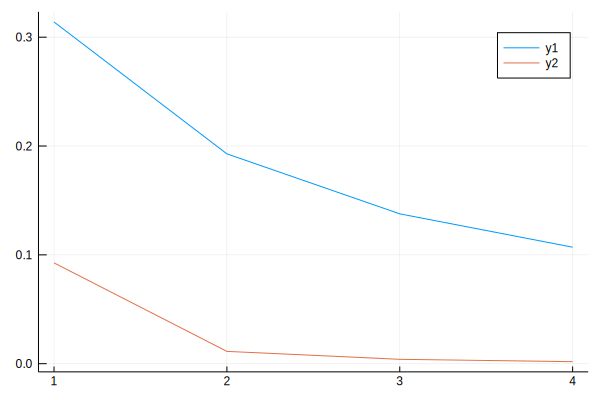

In [42]:
#  wykres błędu względnego w zależności od stopnia użytej
#+ kwadratury
plot(Drel_errorIC)
plot!(Drel_errorIS)

#### Właściwy podpunkt D

In [43]:
# Wyniki dla IC (po podstawieniu)
DresultsICv2 = [base_q_1(shift(Cnew)),base_q_2(shift(Cnew)),
        base_q_3(shift(Cnew)),base_q_4(shift(Cnew))]

4-element Array{Float64,1}:
 1.9378248434212895
 1.811712813751607 
 1.8088561617500678
 1.809048965080314 

In [44]:
# Wyniki dla IS (po podstawieniu)
DresultsISv2 = [base_q_1(shift(Snew)),base_q_2(shift(Snew)),
        base_q_3(shift(Snew)),base_q_4(shift(Snew))]

4-element Array{Float64,1}:
 0.4948079185090459
 0.6273119924552861
 0.6205537702420836
 0.6205328934327077

In [45]:
# wartość błędu bezwzględnego - IC (po podstawieniu)
DerrorICv2 = abs.([x-Int_C_exact_value for x in DresultsICv2])

4-element Array{Float64,1}:
 0.12877962447428937   
 0.0026675948046068765 
 0.00018905719693229628
 3.746133313997646e-6  

In [46]:
# wartość błędu bezwzględnego - IS (po podstawieniu)
DerrorISv2 = abs.([x-Int_S_exact_value for x in DresultsISv2])

4-element Array{Float64,1}:
 0.12574115341495412  
 0.006762920531286132 
 4.698318083584674e-6 
 1.6178491292317965e-5

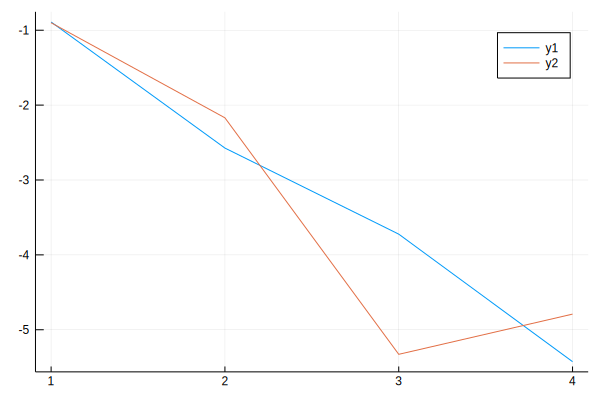

In [47]:
#  wykres błędu bezwzględnego w zależności od stopnia użytej 
#+ kwadratury
plot([log10(x) for x in DerrorICv2])
plot!([log10(x) for x in DerrorISv2])

In [48]:
# błąd względny - IC (po podstawieniu)
Drel_errorICv2 = [abs(x/Int_C_exact_value) for x in DerrorICv2]

4-element Array{Float64,1}:
 0.07118651492263348   
 0.0014745871339576667 
 0.00010450661760812245
 2.0707792567939107e-6 

In [49]:
# błąd względny - IS (po podsrawieniu)
Drel_errorISv2 = [abs(x/Int_S_exact_value) for x in DerrorISv2]

4-element Array{Float64,1}:
 0.20262886386260506  
 0.010898284821082451 
 7.57122731489652e-6  
 2.6071252096400492e-5

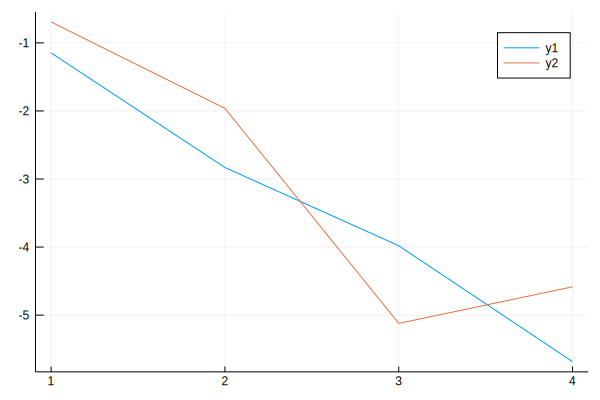

In [50]:
#  wykres błędu względnego w zależności od stopnia użytej 
#+ kwadratury
plot([log10(x) for x in Drel_errorICv2])
plot!([log10(x) for x in Drel_errorISv2])

#### Porównanie wyników dla obu przedstawień całek

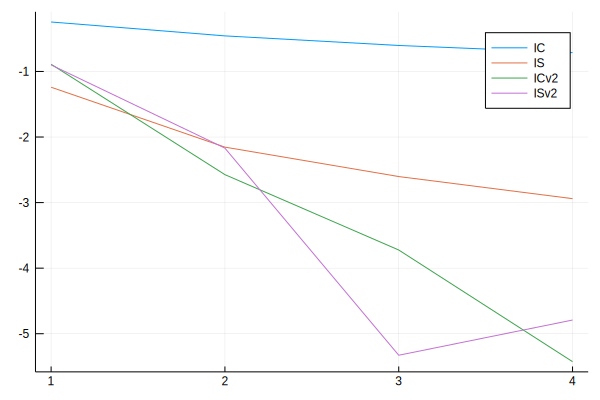

In [51]:
#　wykres błędów bezwględnych
plot([log10(x) for x in DerrorIC], label="IC")
plot!([log10(x) for x in DerrorIS], label="IS")
plot!([log10(x) for x in DerrorICv2], label="ICv2")
plot!([log10(x) for x in DerrorISv2], label="ISv2")

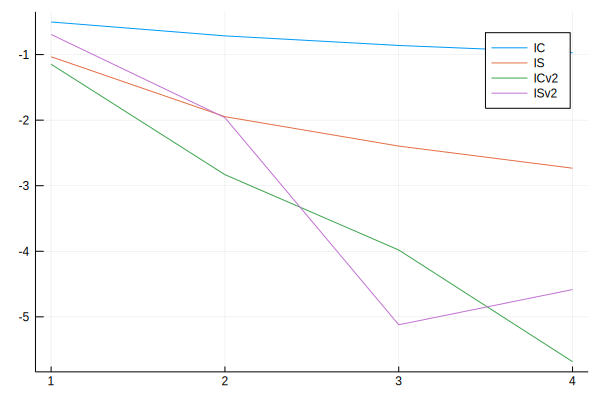

In [52]:
# wykres błędów względnych 
plot([log10(x) for x in Drel_errorIC], label="IC")
plot!([log10(x) for x in Drel_errorIS], label="IS")
plot!([log10(x) for x in Drel_errorICv2], label="ICv2")
plot!([log10(x) for x in Drel_errorISv2], label="ISv2")

Obserwacje:
Wyniki dla funkcji rozwijających się w szeregi potęgowe są znacznie dokładniejsze, czego można się było spodziewać.
W przypadku IC dodatkowo dalej występuje problem w zerze.
Jescze nie wiem, dlaczego dokładność obliczania ISv2 zmniejsza się przy kwadraturze st. 4. względem kwadratury st. 3.
Być może nie chodzi tu wogóle o wartość całki z ogona szeregu Tailora.

## #Podsumowanie wszystkich metod:

In [53]:
DISv2 =["IS deg 1","IS deg 2","IS deg 3","IS deg 4"]
DICv2 =["IC deg 1","IC deg 2","IC deg 4","IC deg 4"]

4-element Array{String,1}:
 "IC deg 1"
 "IC deg 2"
 "IC deg 4"
 "IC deg 4"

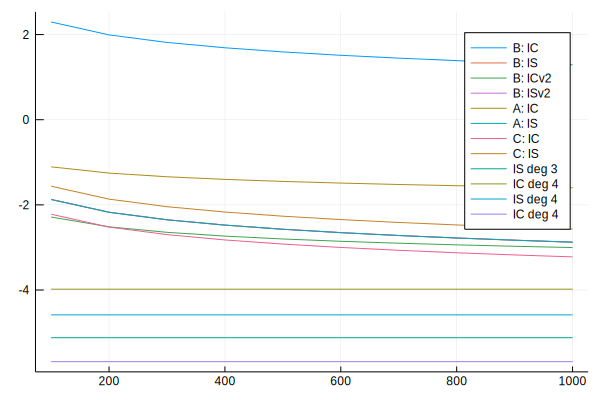

In [55]:
plo=plot(Brange, [log10(x) for x in Brel_errorIC], label="B: IC")
plo=plot!(Brange, [log10(x) for x in Brel_errorIS], label="B: IS")
plo=plot!(Brange, [log10(x) for x in Brel_errorICv2], label="B: ICv2")
plo=plot!(Brange, [log10(x) for x in Brel_errorISv2], label="B: ISv2")
plo=plot!(Arange, [log10(x) for x in Arel_errorIC], label="A: IC")
plo=plot!(Arange, [log10(x) for x in Arel_errorIS], label="A: IS")
plo=plot!(Arange, [log10(x) for x in Crel_errorIC_rangeA], label="C: IC")
plo=plot!(Arange, [log10(x) for x in Crel_errorIS_rangeA], label="C: IS")
for i in 3:4
    plo=plot!(Arange, [log10(Drel_errorISv2[i]) for x in Arange], label=DISv2[i])
    plo=plot!(Arange, [log10(Drel_errorICv2[i]) for x in Arange], label=DICv2[i])
end

plo

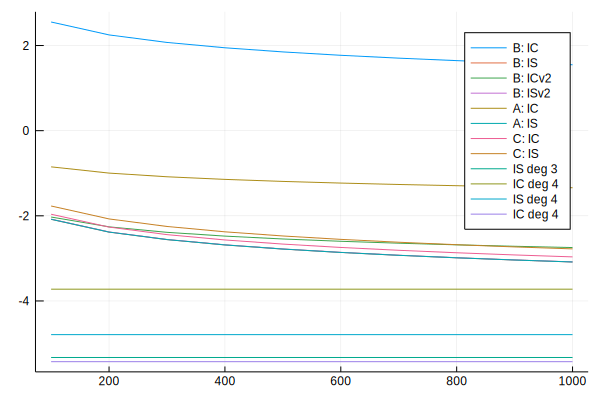

In [56]:
plo=plot(Brange, [log10(x) for x in BerrorIC], label="B: IC")
plo=plot!(Brange, [log10(x) for x in BerrorIS], label="B: IS")
plo=plot!(Brange, [log10(x) for x in BerrorICv2], label="B: ICv2")
plo=plot!(Brange, [log10(x) for x in BerrorISv2], label="B: ISv2")
plo=plot!(Arange, [log10(x) for x in AerrorIC], label="A: IC")
plo=plot!(Arange, [log10(x) for x in AerrorIS], label="A: IS")
plo=plot!(Arange, [log10(x) for x in CerrorIC_rangeA], label="C: IC")
plo=plot!(Arange, [log10(x) for x in CerrorIS_rangeA], label="C: IS")
for i in 3:4
    plo=plot!(Arange, [log10(DerrorISv2[i]) for x in Arange], label=DISv2[i])
    plo=plot!(Arange, [log10(DerrorICv2[i]) for x in Arange], label=DICv2[i])
end

plo

In [57]:
x_1 = -1*sqrt(525.0 - 70*sqrt(30.0))/35.0;
x_2 = -1*sqrt(525.0 + 70*sqrt(30.0))/35.0;
x_3 = sqrt(525.0 + 70*sqrt(30.0))/35.0;
x_4 = sqrt(525.0 - 70*sqrt(30.0))/35.0;

w_1 = (18.0+sqrt(30.0))/36.0;
w_2 = (18.0-sqrt(30.0))/36.0;
w_3 = (18.0-sqrt(30.0))/36.0;
w_4 = (18.0+sqrt(30.0))/36.0;

@printf("%.16f,%.16f \n%.16f,%.16f \n %.16f,%.16f \n%.16f,%.16f\n",x_1,x_2,x_3,x_4,w_1,w_2,w_3,w_4);

-0.3399810435848563,-0.8611363115940526 
0.8611363115940526,0.3399810435848563 
 0.6521451548625462,0.3478548451374538 
0.3478548451374538,0.6521451548625462
